In [1]:
# an example of a class; this will allow us to make circle objects

class circ:
    """Class will represent a circle in plane, with center a complex number"""
    def __init__(self, center, radius):
        # this is the default function that gets called
        # when a new instance of a circ object is created
        
        # below are the variables associated with the class, called data attributes
        self.center = center  
        self.radius = radius
        
    # below is a function associated with the class, called a method
    # the first argument to a method is typically self
    def draw(self):
        """Return graphics object that represents self"""
        return circle((N(self.center.real()), \
                       N(self.center.imag())),N(self.radius), thickness=0.06)

In [2]:
# Create a new instance of circ object, and assign it to variable c1
# The arguments match up with the __init__ constructor method above,
# except that the self value is automatically passed
c1 = circ((1+2*i), 3)

In [3]:
# call the draw method of the circ object, which returns a graphics object
circle_plot = c1.draw()

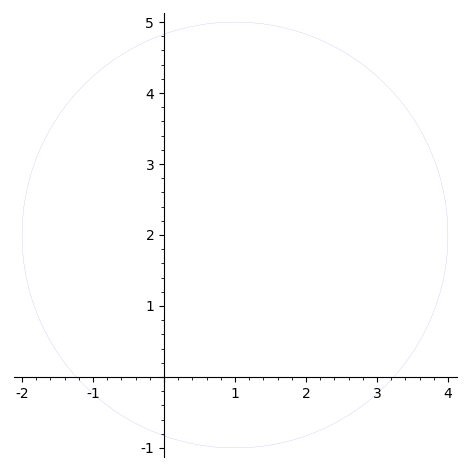

In [4]:
plot(circle_plot)

In [5]:
# Sage automatically knows how to multipy (and add) complex numbers 
(1+2*i) *(2*i)

2*I - 4

In [6]:
(1+2*i).imag() # extracts the imaginary part

2

In [7]:
# Below is a key building block to make appollonian gasket
def ap_circle(c1, c2, c3):
    """Takes in circ objects c1,c2,c3 mutually externally 
    tangent. Returns circ externally tangent to all 3"""
    k1 = 1/c1.radius; k2 = 1/c2.radius; k3 = 1/c3.radius
    k4 = k1 + k2 + k3 + 2*sqrt(k1*k2 + k2*k3 + k1*k3)
    
    z1 = c1.center; z2 = c2.center; z3 = c3.center
    z4 = (z1*k1 + z2*k2 + z3*k3 + \
          2*sqrt(z1*z2*k1*k2 + z2*z3*k2*k3 + z1*z3*k1*k3))/k4
    return circ(z4, 1/k4)

In [8]:
# test configuration of circles
a1 = circ(0,0.5); a2 = circ(1.0, 0.5); a3=circ(0.5+i*sqrt(3.0)/2, 0.5)

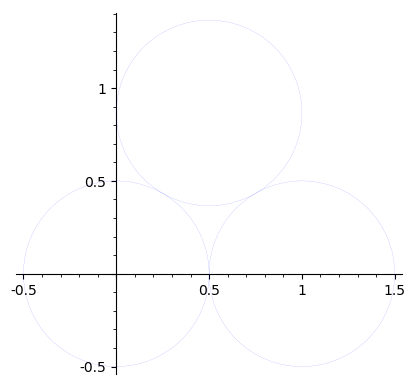

In [9]:
plot(a1.draw() + a2.draw() + a3.draw())

In [10]:
# test the ap_circle function
c4 = ap_circle(a1,a2,a3)

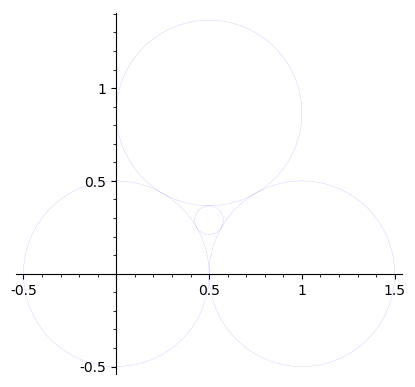

In [11]:
plot(a1.draw() + a2.draw() + a3.draw()+ c4.draw())

In [12]:
# make a new circle, using two of the originals, plus the new c4
c5 = ap_circle(a1,a2,c4)

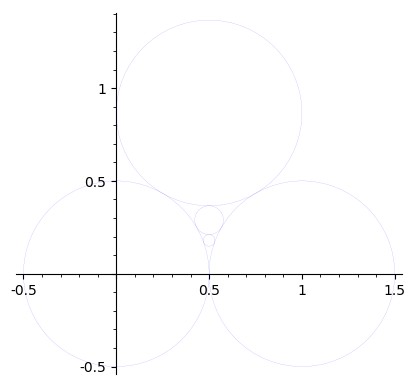

In [13]:
plot(a1.draw() + a2.draw() + a3.draw()+ c4.draw() + c5.draw())

In [14]:
c6 = ap_circle(a1,a3,c4)

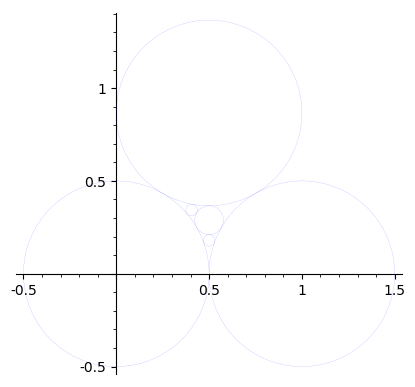

In [15]:
plot(a1.draw() + a2.draw() + a3.draw()+ c4.draw() + c5.draw() + c6.draw())

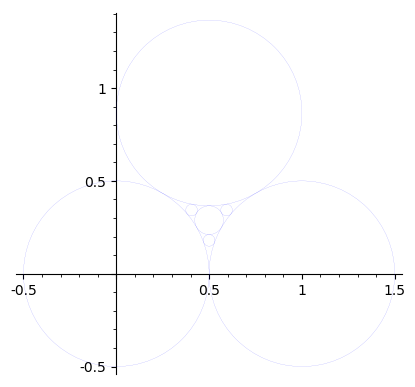

In [16]:
# code for 1st iteration of apollonian gasket

# generate a list of four circles that fill in the 
# gap between a1,a2,a3

a = ap_circle(a1,a2,a3)
list_circles = [a]
list_circles.append(ap_circle(a1,a2,a))
list_circles.append(ap_circle(a1,a3,a))
list_circles.append(ap_circle(a2,a3,a))
    
# Draw the circs in list_circles, together with original three
graphic = a1.draw() + a2.draw() + a3.draw()
for c in list_circles:
    graphic += c.draw()
plot(graphic)

In [17]:
# Code for apollonian gasket with arbitarily many iterations

def ap_gasket(c1,c2,c3,iter):
    """Given c1,c2,c3 mutually externally tangent circ objects,
    returns apollonian gasket starting with those,
    running for iter iterations. Returns a list of circ objects."""
    if iter == 0:
        return [ap_circle(c1,c2,c3)]
    a = ap_circle(c1,c2,c3)
    list_circles = [a]
    list_circles += ap_gasket(c1,c2,a, iter-1)
    list_circles += ap_gasket(c1,c3,a, iter-1)
    list_circles += ap_gasket(c2,c3,a, iter-1)
    return list_circles

In [18]:
# make gasket starting with our test configuration, and 3 iterations
list_circles = ap_gasket(a1,a2,a3,3)
graphic = a1.draw() + a2.draw() + a3.draw()
for c in list_circles:
    graphic += c.draw()
graphic.save("ap_circle_3.pdf")
plot(graphic)
len(list_circles)

40

In [19]:
# make gasket with our test configuration, and 5 iterations
list_circles = ap_gasket(a1,a2,a3,5)
graphic = a1.draw() + a2.draw() + a3.draw()
for c in list_circles:
    graphic += c.draw()
graphic.save("ap_circle_5.pdf")
plot(graphic)
len(list_circles)

364